In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_excel("C:/Users/goeld/OneDrive/Desktop/Machine Learning/Gearbox Fault Diagnosis using ML algorithms/faultdataset.xlsx")

In [6]:
print(data.head(10))

         a1        a2  state
0  2.350390  1.454870      0
1  2.452970  1.400100      0
2 -0.241284 -0.267390      0
3  1.130270 -0.890918      0
4 -1.296140  0.980479      0
5 -1.650290  1.011530      0
6  0.429159 -1.163700      0
7 -0.191893 -2.945480      0
8  1.417660 -3.317650      0
9  1.699620 -2.446150      0


In [12]:
data.describe()


,a1,a2,state
count,20000.000000,20000.000000,20000.000000
mean,0.024046,0.006011,0.500000
std,5.897926,4.231061,0.500013
min,-36.989500,-23.710700,0.000000
25%,-3.107135,-2.360157,0.000000
50%,-0.043941,0.071639,0.500000
75%,3.011813,2.520958,1.000000
max,33.375500,20.906000,1.000000


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      20000 non-null  float64
 1   a2      20000 non-null  float64
 2   state   20000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 468.9 KB
None


In [14]:
datastatcat = data.astype('object').describe()

print(datastatcat)

                a1          a2  state
count   20000.0000  20000.0000  20000
unique  19888.0000  19877.0000      2
top        17.0765     -2.2525      0
freq        2.0000      2.0000  10000


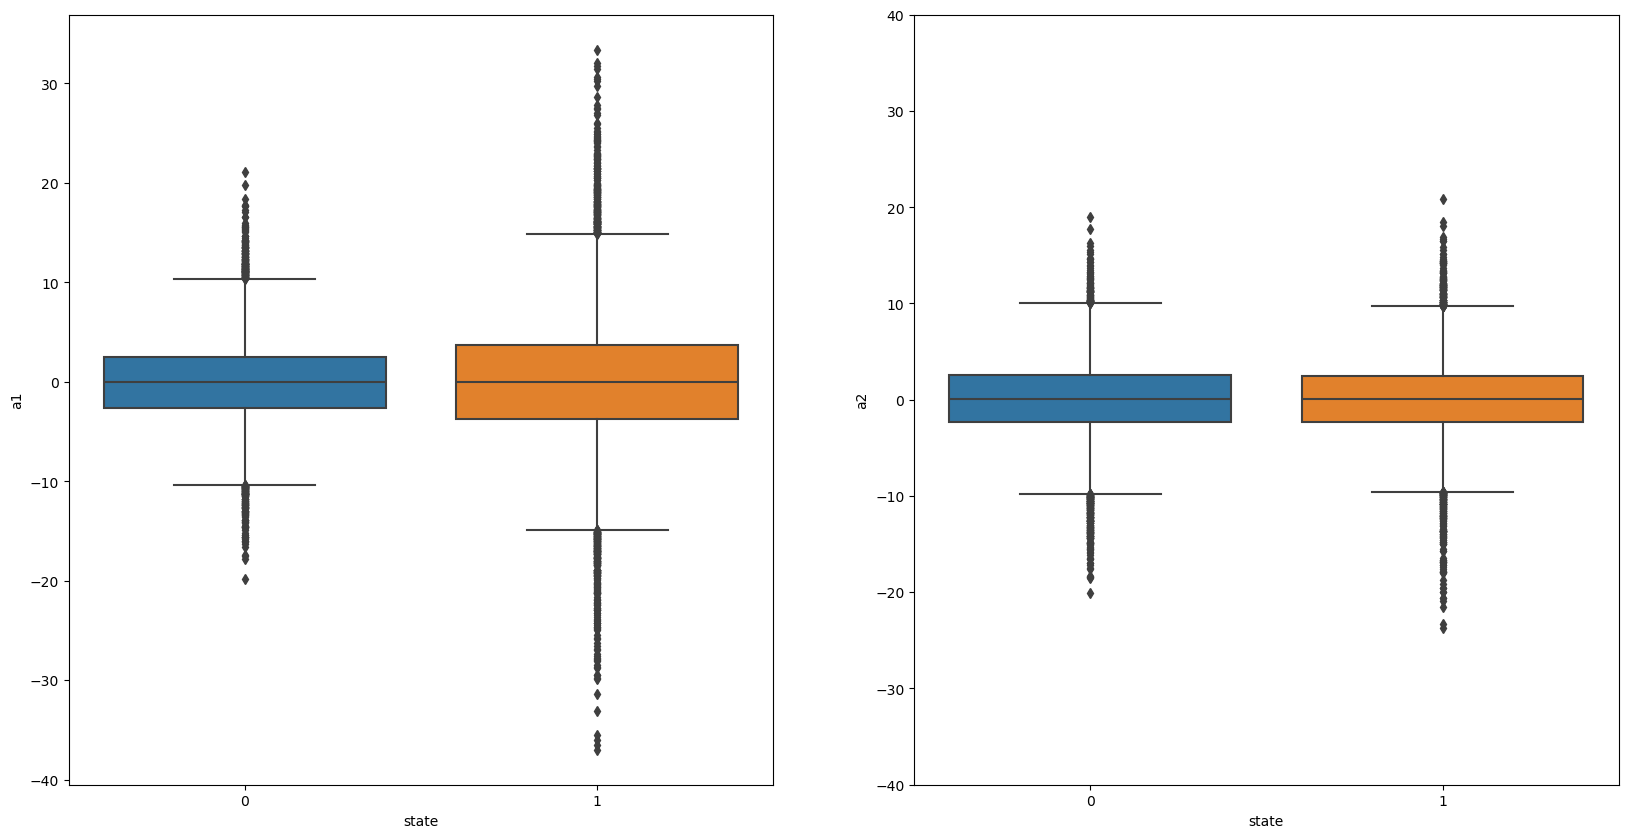

In [16]:
fig, axes = plt.subplots(1,2, figsize = (20, 10))

sns.boxplot(ax = axes[0], x= 'state', y = 'a1', data= data)

sns.boxplot(ax = axes[1], x= 'state', y = 'a2', data = data)

plt.ylim(-40, 40)

plt.show()

In [17]:
X = data.drop('state', axis =1)
print('X Shape =', X.shape)

Y = data['state']

print('Y shape =', Y.shape)


X Shape = (20000, 2)
Y shape = (20000,)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30, random_state= 1)

print('X Train shape =', X_train.shape)

print('X Test shape =', X_test.shape)

print('Y Train shape =', Y_train.shape)

print('Y Test shape =', Y_test.shape)

X Train shape = (14000, 2)
X Test shape = (6000, 2)
Y Train shape = (14000,)
Y Test shape = (6000,)


In [19]:
lr_model = LogisticRegression(random_state= 0).fit(X_train, Y_train)

lr_model_score = lr_model.score(X_test, Y_test)

print('Logistic Regression Model Score = ', lr_model_score)



Logistic Regression Model Score =  0.49333333333333335


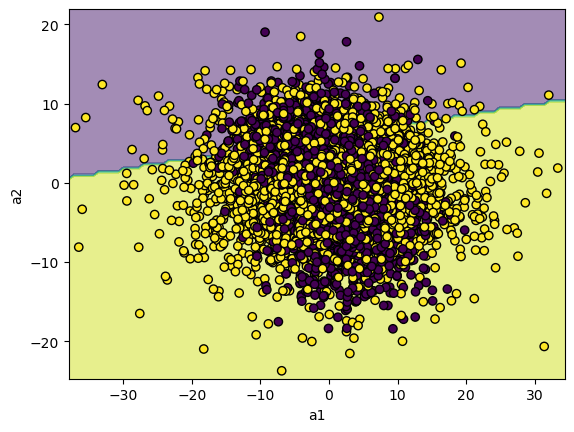

In [20]:
ax1 = DecisionBoundaryDisplay.from_estimator(lr_model, X_train, response_method= "predict", alpha = 0.5)

ax1.ax_.scatter(X_train.iloc[:,0], X_train.iloc[:, 1], c =Y_train, edgecolors = "k")

plt.show()

In [21]:
rm_model = RandomForestClassifier(max_depth= 2, random_state= 0).fit(X_train, Y_train)

rm_model_score = rm_model.score(X_test, Y_test)

print('Random Forest Model Score =', rm_model_score)



Random Forest Model Score = 0.5838333333333333


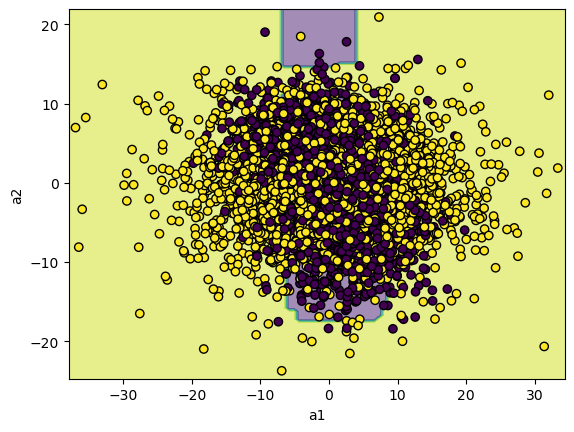

In [22]:
ax2 = DecisionBoundaryDisplay.from_estimator(rm_model, X_train, response_method= "predict", alpha = 0.5)

ax2.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = Y_train, edgecolors= "k")

plt.show()



In [23]:
mlp_model = MLPClassifier(random_state= 1, max_iter= 500).fit(X_train, Y_train)

mlp_model_score = mlp_model.score(X_test, Y_test)

print("ANN based Model Fitness Score = ", mlp_model_score)



ANN based Model Fitness Score =  0.5955


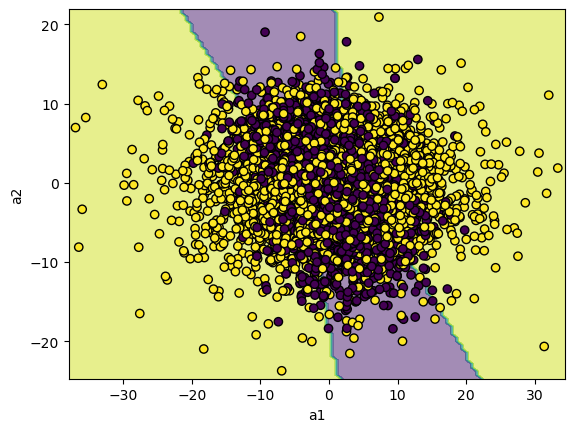

In [24]:
ax3 = DecisionBoundaryDisplay.from_estimator(mlp_model, X_train, response_method= "predict", alpha = 0.5)

ax3.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c =Y_train, edgecolors= "k")

plt.show()



In [26]:
kn_model = KNeighborsClassifier(n_neighbors= 2).fit(X_train, Y_train)

kn_model_score = kn_model.score(X_test, Y_test)

print("KNN-based Model fitness score =", kn_model_score)

KNN-based Model fitness score = 0.5531666666666667


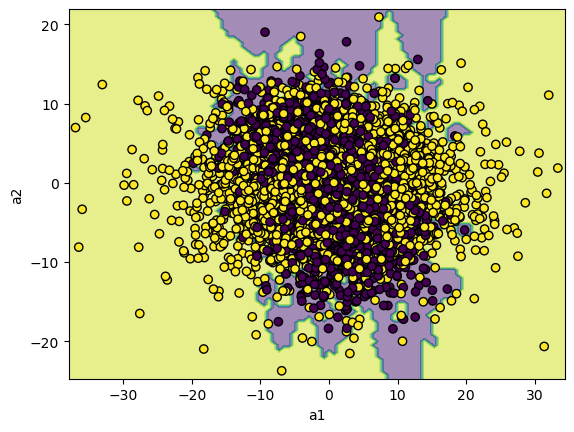

In [27]:
ax4 = DecisionBoundaryDisplay.from_estimator(kn_model, X_train, response_method= "predict", alpha = 0.5)

ax4.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c =Y_train, edgecolors= "k")

plt.show()

